In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.dpi'] = 300

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

(-1, 3.5)

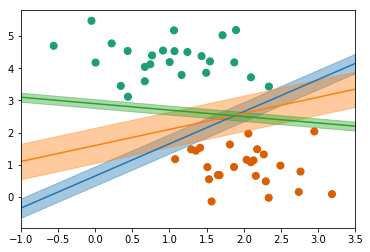

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y), s=50);
plt.xlim(-.6, 3.5)

xfit = np.linspace(-1, 3.5)

for m, b, d in [(1, 0.65, 0.3), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.14)]:
    yfit = m * xfit + b
    line, = plt.plot(xfit, yfit)
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     alpha=0.4, color=line.get_color())

plt.xlim(-1, 3.5)

Text(0.5, 1.0, 'C=1')

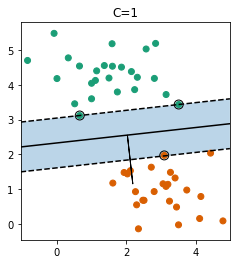

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
X[:, 0] *= 1.5
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
plt.arrow(xx[25], yy[25], w[0], w[1])
plt.gca().set_aspect("equal")
plt.xlim(xx[0], xx[-1])
plt.title("C=1")

Text(0.5, 1.0, 'C=0.1')

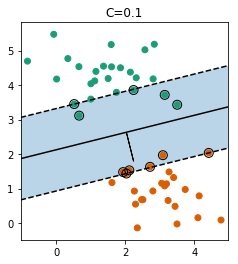

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# fit the model
clf = svm.SVC(kernel='linear', C=.1)
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)

yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
plt.gca().set_aspect("equal")
plt.arrow(xx[25], yy[25], w[0], w[1])
plt.gca().set_aspect("equal")

plt.xlim(xx[0], xx[-1])
plt.title("C=0.1")

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

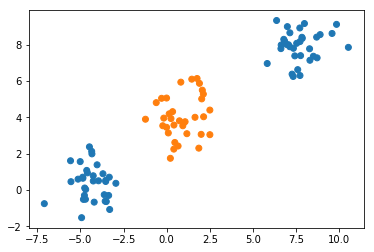

In [6]:
X, y = make_blobs(random_state=3)
y = (y == 0).astype(np.int)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(y))

In [7]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)

In [8]:
X.shape, X_poly.shape

((100, 2), (100, 5))

In [9]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [10]:
linear_svm = SVC(kernel="linear", gamma='scale').fit(X_poly, y)
poly_svm = SVC(kernel="poly", degree=2, coef0=1, gamma='scale').fit(X, y)

In [11]:
linear_svm.coef_

array([[ 0.139,  0.06 , -0.201,  0.048,  0.019]])

In [12]:
linear_svm.dual_coef_

array([[-0.03 , -0.003,  0.003,  0.03 ]])

In [13]:
linear_svm.support_

array([ 1, 26, 42, 62], dtype=int32)

In [14]:
poly_svm.dual_coef_

array([[-0.605, -0.055,  0.58 ,  0.081]])

In [15]:
poly_svm.support_

array([ 1, 41, 38, 42], dtype=int32)

In [16]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 1000)
y_lin = np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 1000)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

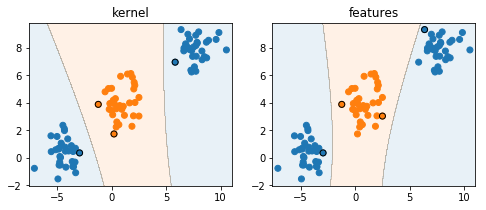

In [17]:
colors = [plt.cm.tab10(0), plt.cm.tab10(0), plt.cm.tab10(1), plt.cm.tab10(1)]
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
for ax, model, name in zip(axes, [poly_svm, make_pipeline(poly, linear_svm)], ["kernel", "features"]):
    ax.set_title(name)
    support_vectors = getattr(model, "support_", None)
    if support_vectors is None:
        support_vectors = model.steps[1][1].support_
    predictions = model.predict(X_grid)
    ax.contourf(x_grid, y_grid, predictions.reshape(x_grid.shape), alpha=.1, colors=colors)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(y))
    ax.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolor='none', edgecolor='k', linewidths=1)
    ax.set_xlim(x_lin[0], x_lin[-1])
    ax.set_ylim(y_lin[0], y_lin[-1])

# Scaling with number of samples

In [18]:
from time import time
from sklearn.svm import LinearSVC

linear, kernel = [], []
samples = [100, 1000, 10000, 100000] #, 1e6, 1e7]
for n_samples in samples:
    X, y = make_blobs(n_samples=int(n_samples), random_state=0)
    y = (y == 0).astype(np.int)
    X_poly = PolynomialFeatures(include_bias=False).fit_transform(X)

    tick = time()
    LinearSVC(dual=False).fit(X_poly, y)
    linear.append(time() - tick)
    tick = time()
    SVC(kernel="poly", degree=2, coef0=1, gamma='scale').fit(X, y)
    kernel.append(time() - tick)

In [19]:
kernel

[0.0008738040924072266,
 0.017716169357299805,
 0.9746637344360352,
 55.26175308227539]

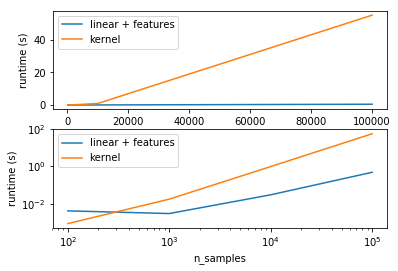

In [20]:
fig, axes = plt.subplots(2, 1)
for ax in axes:
    ax.plot(samples, linear, label="linear + features")
    ax.plot(samples, kernel, label="kernel")
    ax.set_ylabel("runtime (s)")
    ax.set_xlabel("n_samples")
    ax.legend()
axes[1].set_xscale("log")
axes[1].set_yscale("log")


Support Vector Regression (SVR) using linear and non-linear kernels

Toy example of 1D regression using linear, polynomial and RBF kernels.




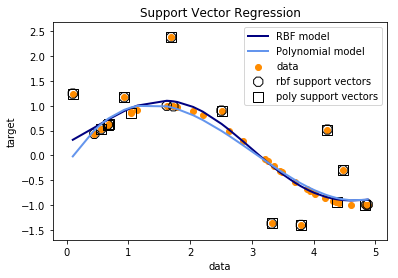

In [21]:
"""
===================================================================
Support Vector Regression (SVR) using linear and non-linear kernels
===================================================================

Toy example of 1D regression using linear, polynomial and RBF kernels.

"""
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=.1, coef0=1,gamma='scale')
y_rbf = svr_rbf.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')

plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')

plt.scatter(X[svr_rbf.support_], y[svr_rbf.support_], facecolor="none", edgecolor="k", marker='8',
            label='rbf support vectors', s=100)
plt.scatter(X[svr_poly.support_], y[svr_poly.support_], facecolor="none", edgecolor="k", marker='s',
            label='poly support vectors', s=100)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=0)

In [23]:
from sklearn.kernel_approximation import RBFSampler
gamma = 1. / (X_train.shape[1] * X_train.std())
approx_rbf = RBFSampler(gamma=gamma, n_components=5000)
print(X_train.shape)
X_train_rbf = approx_rbf.fit_transform(X_train)
print(X_train_rbf.shape)

(1347, 64)
(1347, 5000)


In [24]:
np.mean(cross_val_score(LinearSVC(dual=False), X_train, y_train, cv=10))

0.9438028376011343

In [25]:
np.mean(cross_val_score(SVC(gamma=gamma), X_train, y_train, cv=10))

0.9873087919404278

In [26]:
np.mean(cross_val_score(LinearSVC(), X_train_rbf, y_train, cv=10))

0.983674991890628